In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

# get all files in the directory RCE_large:
import os
files = os.listdir('RCE_large')
files = [f for f in files if f.endswith('.nc')]
files.sort()

#print all cloud-resolving models:
filtered_295 = [f for f in files if '295' in f and 'CRM' in f and 'cfv1-cfv2' in f]
filtered_300 = [f for f in files if '300' in f and 'CRM' in f and 'cfv1-cfv2' in f]
filtered_305 = [f for f in files if '305' in f and 'CRM' in f and 'cfv1-cfv2' in f]
# for f in filtered_300:
#      print(f)

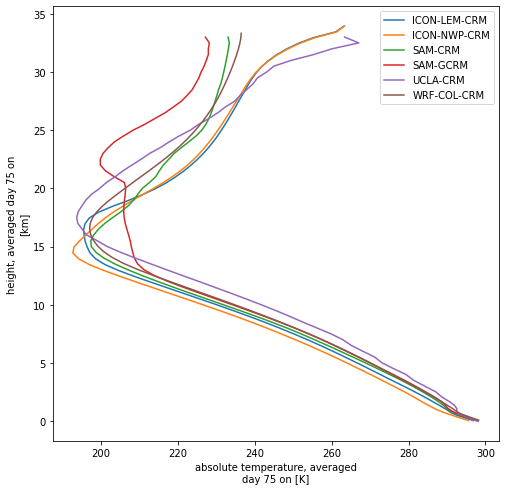

In [3]:
var = 'ta_avg'

fig, axs = plt.subplots(1, 1, figsize=(8, 8))
for f in filtered_300:
    name = f.split('_')[0]
    ds = xr.open_dataset('RCE_large/'+f)
    ds[var].plot(y='zg_avg',ax = axs,label = name)
axs.legend()

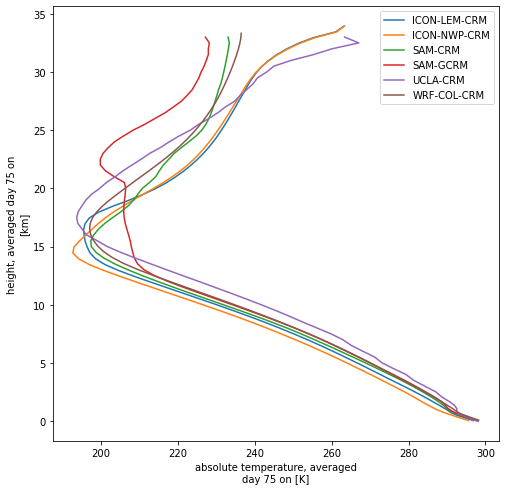

In [3]:
var = 'ta_avg'

fig, axs = plt.subplots(1, 1, figsize=(8, 8))
for f in filtered_300:
    name = f.split('_')[0]
    ds = xr.open_dataset('RCE_large/'+f)
    ds[var].plot(y='zg_avg',ax = axs,label = name)
axs.legend()

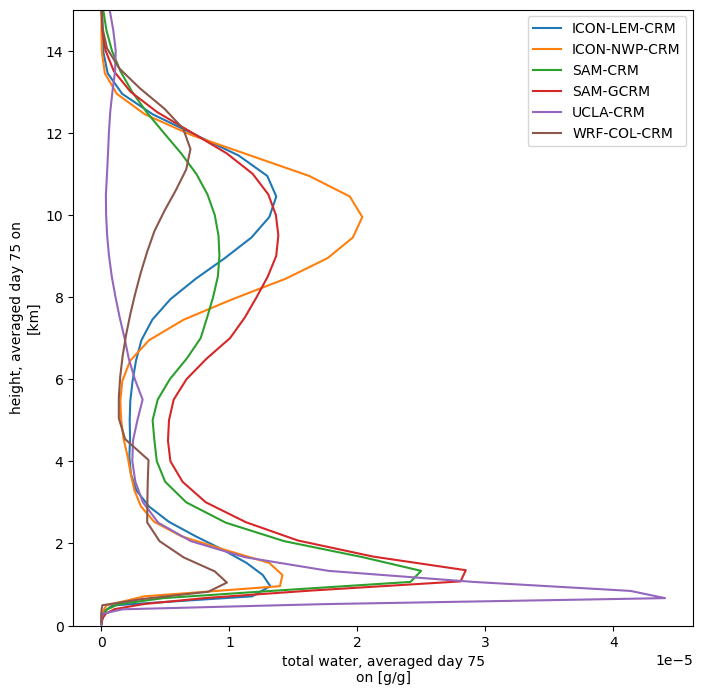

In [87]:
var = 'tw_avg'

fig, axs = plt.subplots(1, 1, figsize=(8, 8))
for f in filtered:
    name = f.split('_')[0]
    ds = xr.open_dataset('RCE_large/'+f)
    ds[var].plot(y='zg_avg',ax = axs,label = name)
axs.set_ylim([0,15])
axs.legend()

(0.0, 17.0)

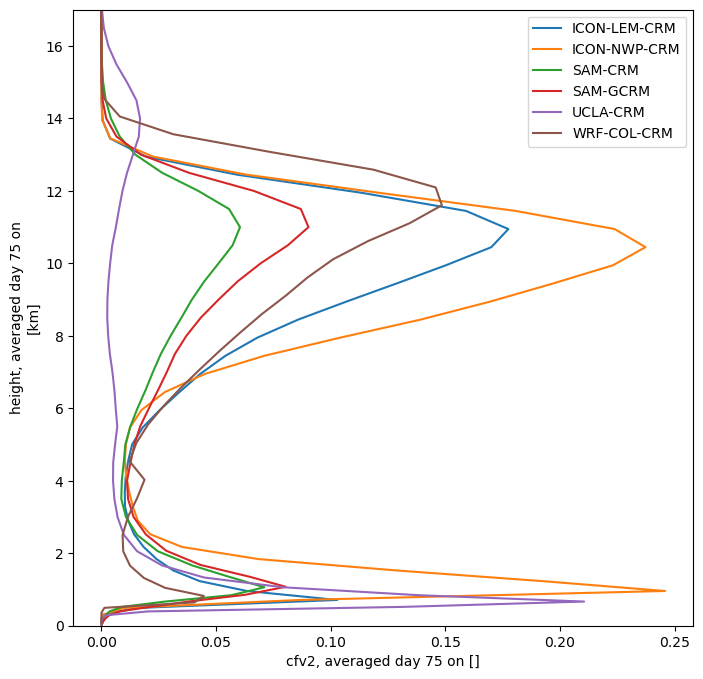

In [92]:
var = 'cfv2_avg'
max_height = 17 #km

fig, axs = plt.subplots(1, 1, figsize=(8, 8))
for f in filtered:
    name = f.split('_')[0]
    ds = xr.open_dataset('RCE_large/'+f)
    ds[var].plot(y='zg_avg',ax = axs,label = name)
axs.legend()
axs.set_ylim([0,max_height])

(0.0, 17.0)

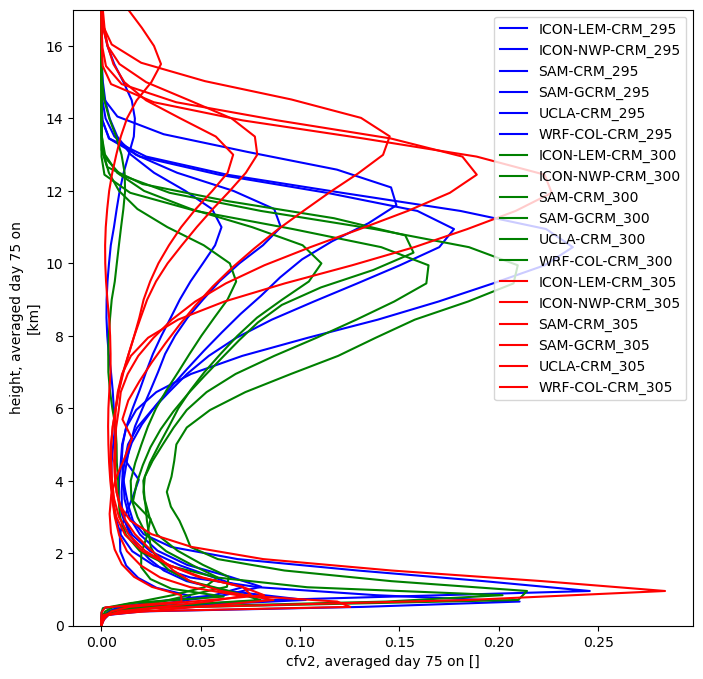

In [106]:
var = 'cfv2_avg'
max_height = 17 #km

fig, axs = plt.subplots(1, 1, figsize=(8, 8))
for f in filtered_300:
    name = f.split('_')[0]
    ds = xr.open_dataset('RCE_large/'+f)
    ds[var].plot(y='zg_avg',ax = axs,label = name+'_295',color='blue')
for f in filtered_295:
    name = f.split('_')[0]
    ds = xr.open_dataset('RCE_large/'+f)
    ds[var].plot(y='zg_avg',ax = axs,label = name+'_300',color='green')
for f in filtered_305:
    name = f.split('_')[0]
    ds = xr.open_dataset('RCE_large/'+f)
    ds[var].plot(y='zg_avg',ax = axs,label = name+'_305',color='red')
axs.legend()
axs.set_ylim([0,max_height])

### 0-D Data Analysis

In [23]:
# read in csv file with the data from the large-scale models:
import pandas as pd
import os
files = os.listdir('RCE_large')
files = [f for f in files if f.endswith('.nc')]
files.sort()

#print all cloud-resolving models:
models = [f[:-35] for f in files if '295' in f and 'cfv1-cfv2' in f]

ds_list = []
temps = [295,300,305]
exp_type = 'large'
for i,t in enumerate(temps):
    path = '/home/tompkins-archive/tompkins/smr3952/RCEMIP/data/A-Statistics/0D/Table_A2_RCE_'+exp_type+str(t)+'.csv'
    df = pd.read_csv(path)
    df_filtered = xr.Dataset.from_dataframe(df[df['Model'].isin(models)])
    df_filtered['tas'] = t
    ds_list.append(df_filtered)

ds= xr.concat(ds_list,dim='tas')

cdict = {
    'CM1': '#1f77b4',      # Blue
    'DAM': '#ff7f0e',      # Orange
    'FV3': '#2ca02c',      # Green
    'ICON-LEM-CRM': '#d62728',  # Red
    'ICON-NWP-CRM': '#9467bd',  # Purple
    'MESONH': '#8c564b',   # Brown
    'MPAS': '#e377c2',     # Pink
    'NICAM': '#7f7f7f',    # Gray
    'SAM-CRM': '#bcbd22',  # Yellow-Green
    'SAM-GCRM': '#17becf', # Teal
    'SCALE': '#393b79',    # Dark Blue
    'UCLA-CRM': '#9edae5', # Light Cyan
    'UKMO-CASIM': '#f7b6d2', # Light Pink
    'UKMO-RA1-T-nocloud': '#c7c7c7',  # Light Gray
    'UKMO-RA1-T': '#e7ba52', # Light Orange
    'WRF-COL-CRM': '#dbdb8d'  # Light Yellow
}

Text(0.5, 0.98, 'Precipitation Sensitivity')

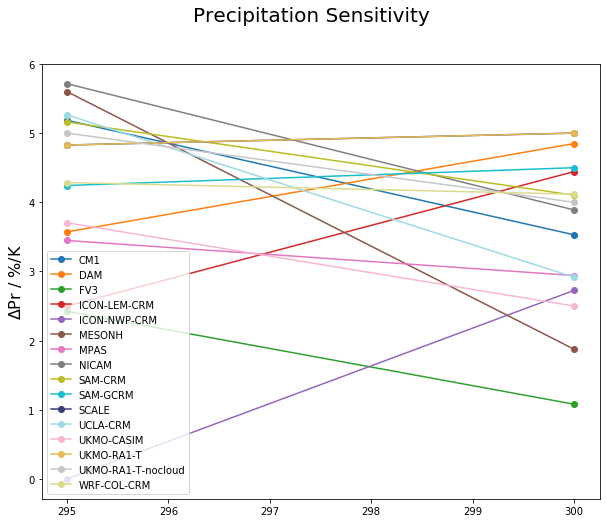

In [24]:
var = 'Precip.'
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
for i,model in enumerate(ds['Model'][0].values):
    sensitivity_295 = (ds[var].sel(tas=300)[i].values / ds[var].sel(tas=295)[i].values -1)*100/5
    sensitivity_300 = (ds[var].sel(tas=305)[i].values / ds[var].sel(tas=300)[i].values -1)*100/5
    Temperatures = [295,300]
    Sensitivities = [sensitivity_295,sensitivity_300]
    axs.plot(Temperatures,Sensitivities,'o-',label=model,color=cdict[model])
axs.legend()
axs.set_ylabel(r'$\Delta$Pr / %/K',fontsize=16)
plt.suptitle('Precipitation Sensitivity',fontsize = 20)
#axs.set_xlim(293,305)

Text(0.5, 0.98, 'R_NET Sensitivity')

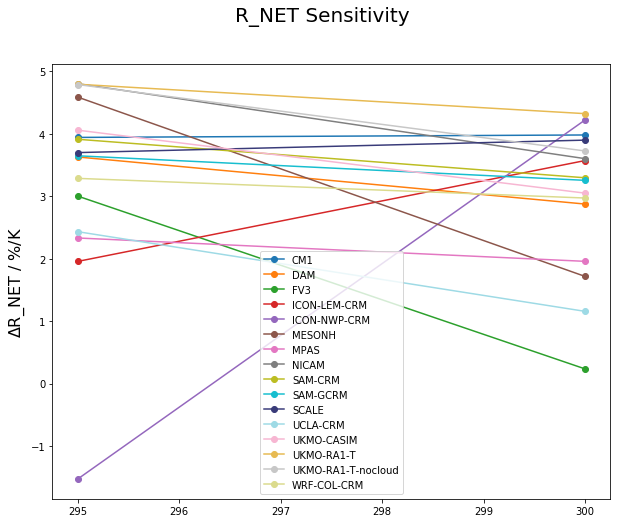

In [25]:
var = 'R_NET'
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
for i,model in enumerate(ds['Model'][0].values):
    sensitivity_295 = (ds[var].sel(tas=300)[i].values / ds[var].sel(tas=295)[i].values -1)*100/5
    sensitivity_300 = (ds[var].sel(tas=305)[i].values / ds[var].sel(tas=300)[i].values -1)*100/5
    Temperatures = [295,300]
    Sensitivities = [sensitivity_295,sensitivity_300]
    axs.plot(Temperatures,Sensitivities,'o-',label=model,color=cdict[model])
axs.legend()
axs.set_ylabel(r'$\Delta$R_NET / %/K',fontsize=16)
plt.suptitle('R_NET Sensitivity',fontsize = 20)

Text(0.5, 0.98, 'Precipitation dependency on water Vapor at different warming levels')

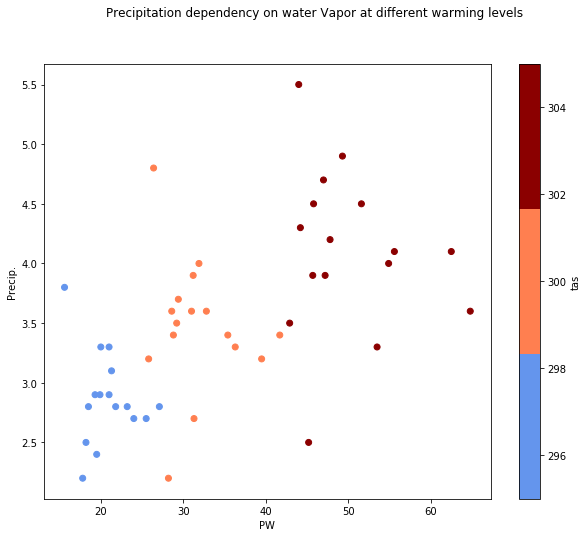

In [26]:
from matplotlib.colors import ListedColormap
custom_colors = ['cornflowerblue', 'coral', 'darkred']  # red, blue, green
cmap = ListedColormap(custom_colors)

fig, axs = plt.subplots(1, 1, figsize=(10, 8))
ds.plot.scatter(x='PW',y='Precip.',ax=axs,hue='tas',cmap=cmap)
plt.suptitle('Precipitation dependency on water Vapor at different warming levels')

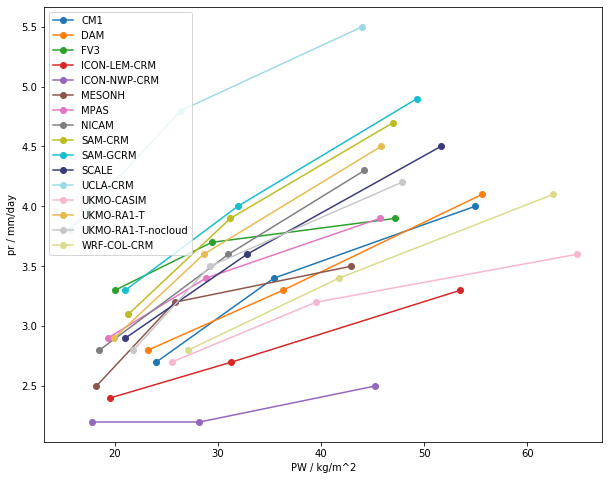

In [27]:
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
#for model in ds.Model[0].values:
def remove_nans(arr):
    return arr.flatten()[~np.isnan(arr.flatten())]
for i,model in enumerate(ds['Model'][0].values):
    pr = ds.where(ds.Model == model)['Precip.'].values
    PW = ds.where(ds.Model == model)['PW'].values
    axs.plot(remove_nans(PW),remove_nans(pr),'-o',label=model,color=cdict[model])
axs.set_ylabel('pr / mm/day')
axs.set_xlabel('PW / kg/m^2')
axs.legend()

Text(0.5, 0.98, 'Pr increase per PW increase')

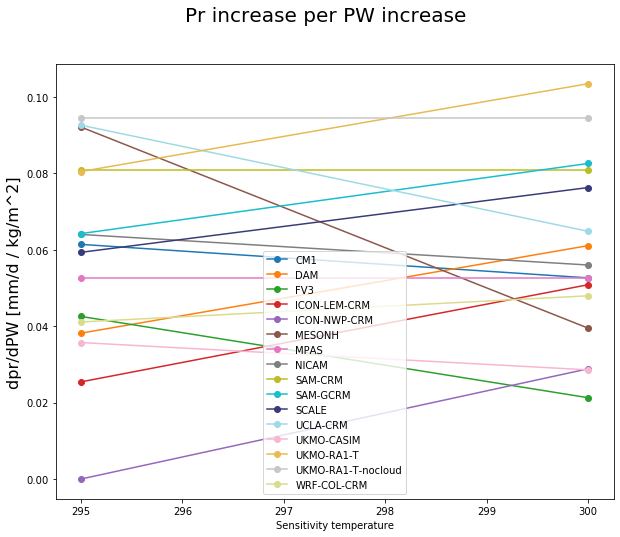

In [28]:
# The slopes look pretty similar. Therefore, what is the percentagewise increse per increase in unit of water vapor?

var = 'Precip.'
fig, axs = plt.subplots(1, 1, figsize=(10, 8))
for i,model in enumerate(ds['Model'][0].values):
    sensitivity_295 = (ds[var].sel(tas=300)[i] - ds[var].sel(tas=295)[i]).values
    sensitivity_300 = (ds[var].sel(tas=305)[i] - ds[var].sel(tas=300)[i]).values
    dPW_295 = (ds['PW'].sel(tas=300)[i] - ds['PW'].sel(tas=295)[i]).values
    dPW_300 = (ds['PW'].sel(tas=305)[i] - ds['PW'].sel(tas=300)[i]).values
    temps = [295,300]
    Sensitivities = [sensitivity_295/dPW_295,sensitivity_300/dPW_295]
    axs.plot(temps,Sensitivities,'o-',label=model,color=cdict[model])
axs.legend()
axs.set_ylabel(r'dpr/dPW [mm/d / kg/m^2]',fontsize=16)
axs.set_xlabel('Sensitivity temperature')
#axs.set_xlim([7,14])
plt.suptitle('Pr increase per PW increase',fontsize = 20)